In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

In [16]:
# load processed dataset
data = np.load("../data/processed_data.npz", allow_pickle=True)
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]
feature_names = data["feature_names"]

In [3]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.71426914, -1.01786452],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.80699872,  0.74138631],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.10576199,  1.05159879],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.88306211, -0.34189136],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
        -1.17064949,  1.97294827],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.63820574,  1.48851435]], shape=(696, 30))

In [4]:
# train the model
classifier = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [5]:
# predicting the test set
y_pred = classifier.predict(X_test)
print(y_pred, y_pred.shape, y_pred.dtype)


[1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1.] (174,) float64


In [6]:
# compare predicted values vs Actual values
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))

[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 

In [7]:
# predicting for one sample
one_sample = X_test[0]
y_hat_1 =classifier.predict([one_sample])[0]
print(y_hat_1)

1.0


In [8]:
# measure model performance
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])


print(f"Confusion Matrix: {cm}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"f1_score: {f1:.3f}")

Confusion Matrix: [[82 18]
 [19 55]]
Accuracy: 0.787
Precision: 0.753
Recall: 0.743
ROC-AUC: 0.851
f1_score: 0.748


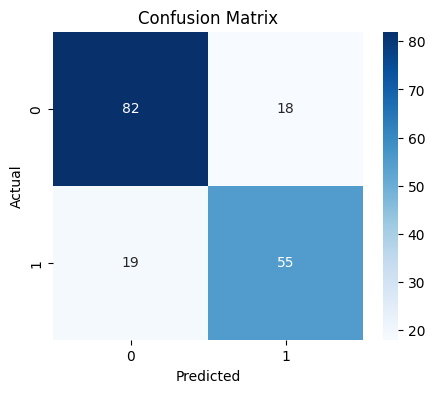

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

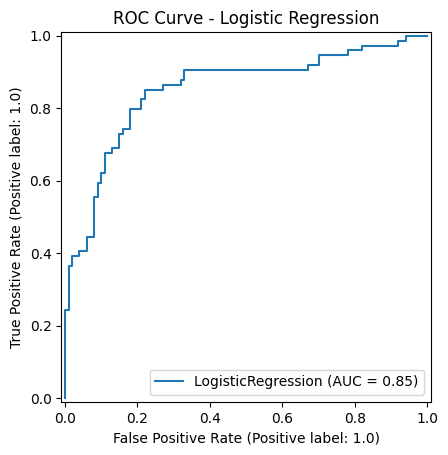

In [10]:
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

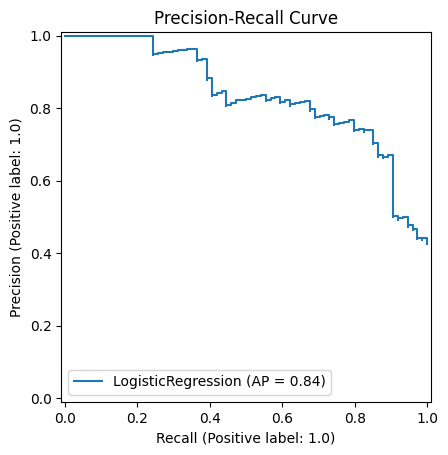

In [11]:
PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()


In [ ]:
# Regularization tuning
for c in [0.01, 0.1, 1, 5, 10]:
    clf = LogisticRegression(C=c, solver='liblinear', max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    print(f"C={c}, Test Accuracy={clf.score(X_test, y_test):.3f}")

C=0.01, Test Accuracy=0.724
C=0.1, Test Accuracy=0.793
C=1, Test Accuracy=0.787
C=5, Test Accuracy=0.787
C=10, Test Accuracy=0.782


In [13]:
classifier.coef_

array([[-0.09880601, -0.49058414,  0.82689703, -0.32614107,  0.86519979,
         1.07200594,  0.20892296, -1.06562916, -0.24166483, -1.00942132,
        -1.13255788,  0.11632286,  0.        ,  0.        ,  0.04466483,
         0.        ,  0.2499793 , -0.0959345 ,  0.66655424,  0.10658604,
         0.11790487,  0.02899805, -1.1326028 ,  1.16124171,  0.33840646,
        -0.60602361,  0.42886781,  0.9869428 , -0.31344665,  0.40468074]])

In [17]:
# check feature importance (coefficients)
coeffs = pd.DataFrame({
    'Feature': feature_names[27:],
    'Coefficient': classifier.coef_.flatten()[27:]
})
coeffs['Abs_Coefficient'] = coeffs['Coefficient'].abs()
coeffs.sort_values(by='Abs_Coefficient', ascending=False).head(10)

,Feature,Coefficient,Abs_Coefficient
0,IsAlone,0.986943,0.986943
2,Fare,0.404681,0.404681
1,Age,-0.313447,0.313447
